# Tutorial

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datasets Used & Loaded 

In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [ ]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
flights_df = sns.load_dataset('flights')
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Distribution Plots

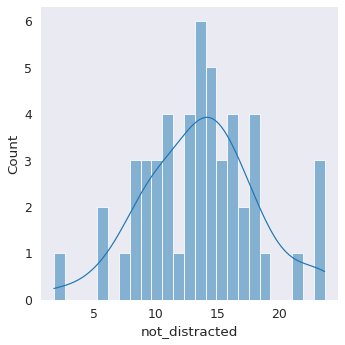

In [ ]:
# Distribution Plots :Univariate Plot to check distribution of variable
#  over the range
sns.displot(crash_df['not_distracted'],kde=True,bins=25)

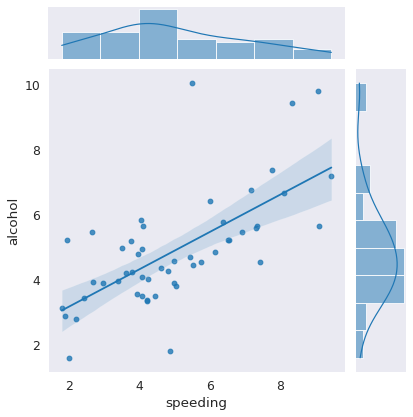

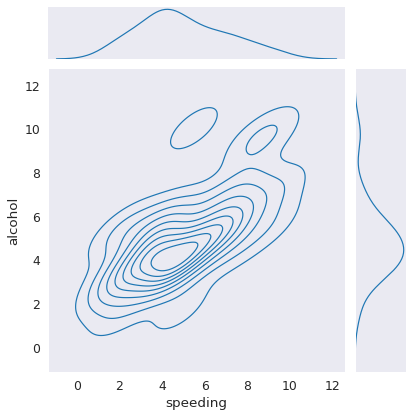

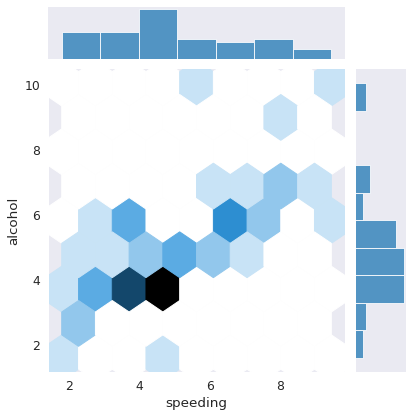

In [ ]:
# Joint Plot : Compare 2 Distribution & plots scatter plot by default
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='reg')
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='kde')
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='hex')

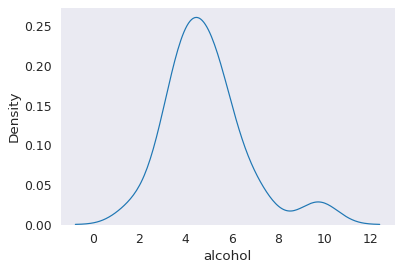

In [ ]:
# KDE Plot
sns.kdeplot(crash_df['alcohol'])

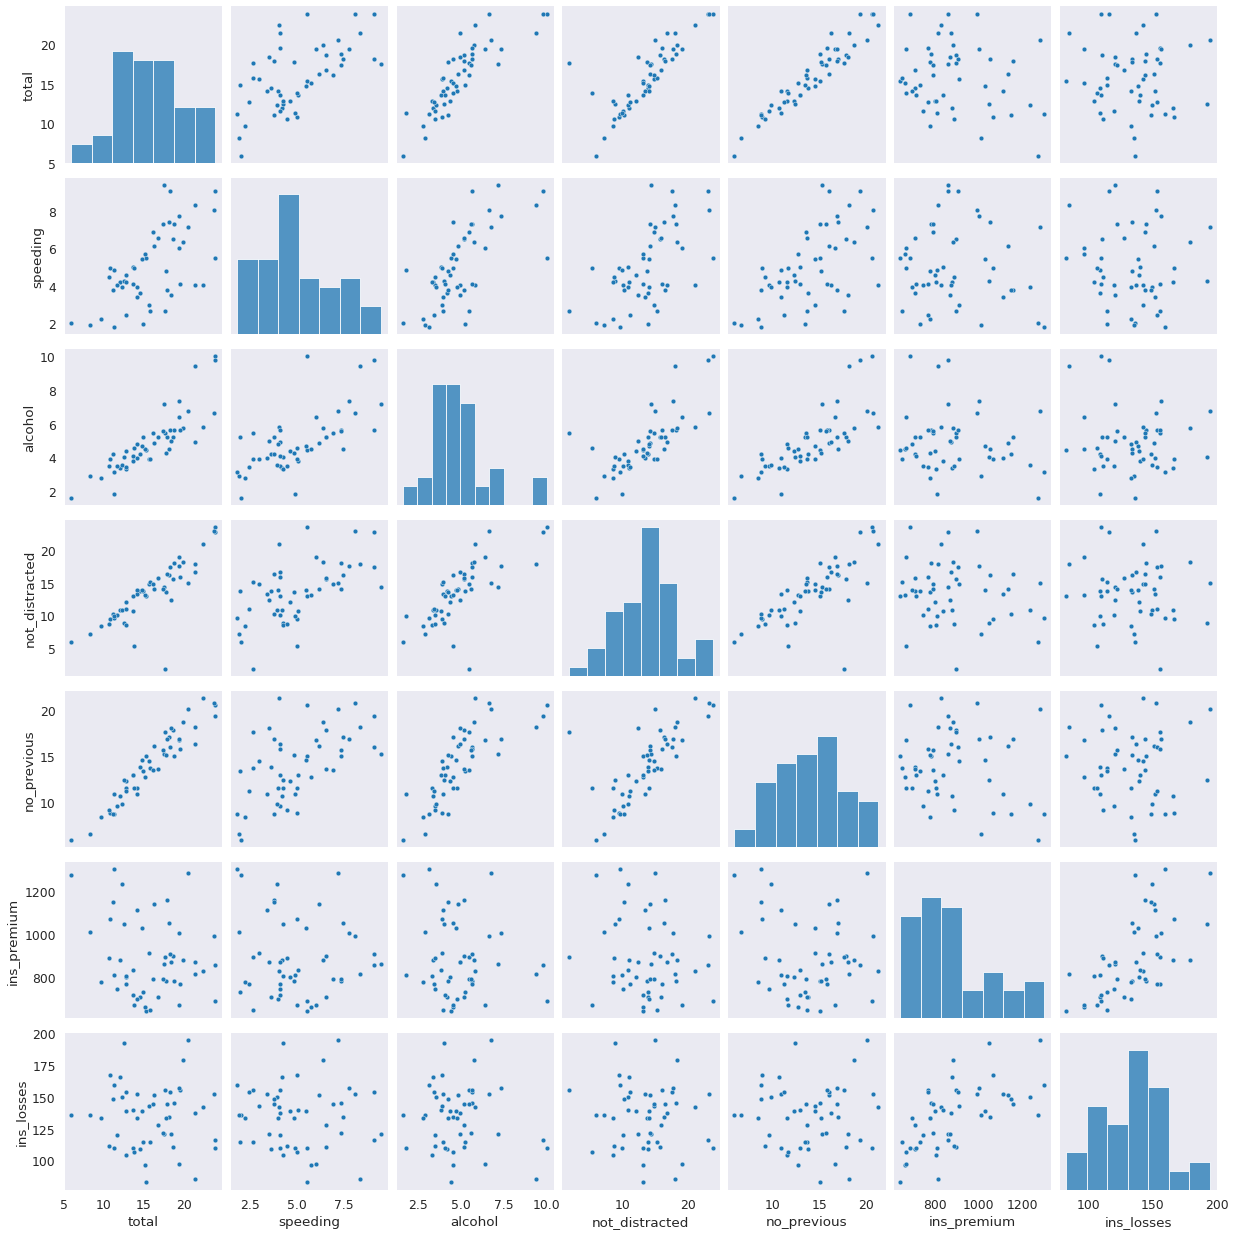

In [ ]:
# Pair Plot : Relationship across the entire data frames numerical values
sns.pairplot(data=crash_df)


In [ ]:
tips_df=sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


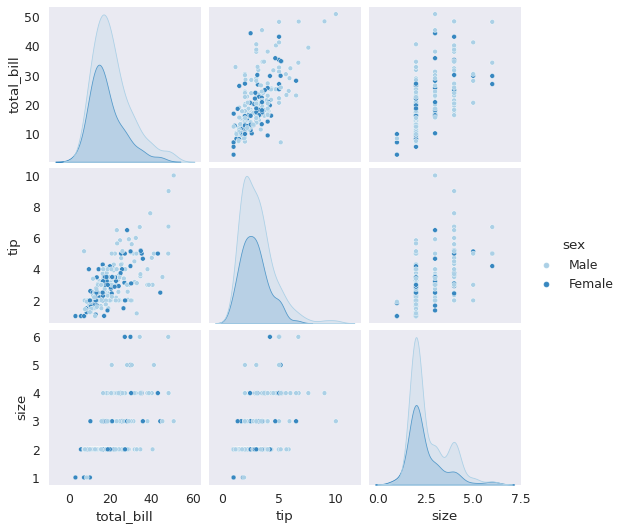

In [ ]:
sns.pairplot(data=tips_df,hue='sex',palette='Blues')

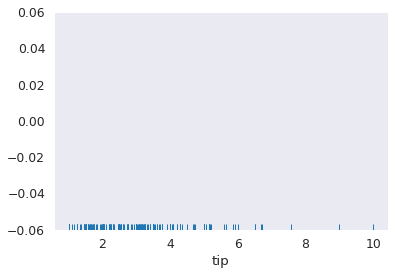

In [ ]:
# Rug Plot : Single Columns of Data Points
sns.rugplot(tips_df['tip'])

## Styling

<Figure size 576x288 with 0 Axes>

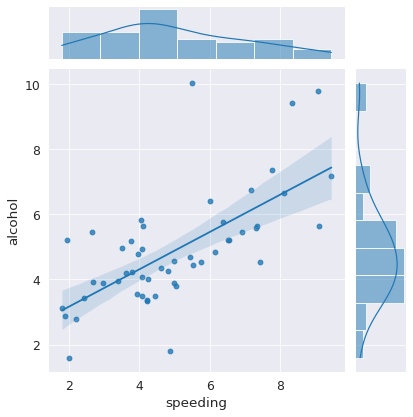

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))

sns.set_context('paper',font_scale=1.4)

sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='reg')

sns.despine(left=False)

## Categorical Plots

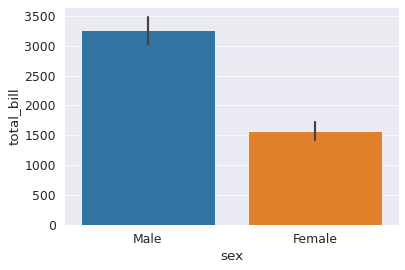

In [ ]:
# Bar Plots
sns.barplot(x='sex',y='total_bill',data=tips_df,estimator=np.sum)

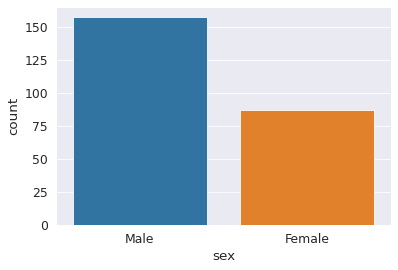

In [ ]:
# Count Plots
sns.countplot(x='sex',data=tips_df)

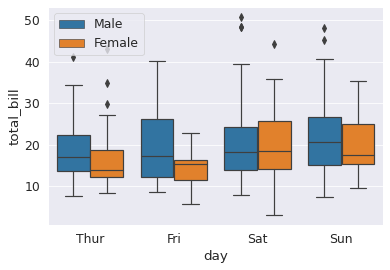

In [ ]:
# Box Plots
sns.boxplot(x='day',y='total_bill',data=tips_df,hue='sex')
plt.legend(loc='best')

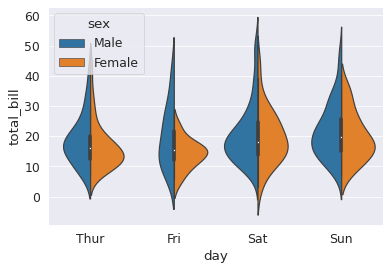

In [ ]:
# Violin Plot : Combination of Box Plot & Kde
sns.violinplot(x='day',y='total_bill',data=tips_df,hue='sex',split=True)

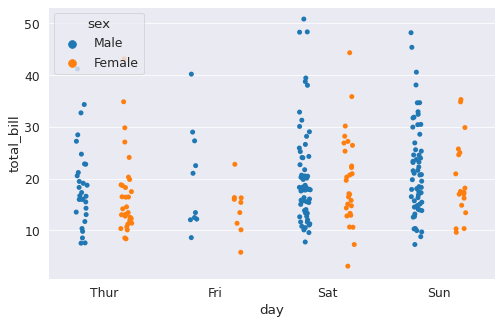

In [ ]:
# Strip Plot : Scatter representing every data point where one varaible is categorical
plt.figure(figsize=(8,5))

sns.stripplot(x='day',y='total_bill',data=tips_df,jitter=True,hue='sex',dodge=True)

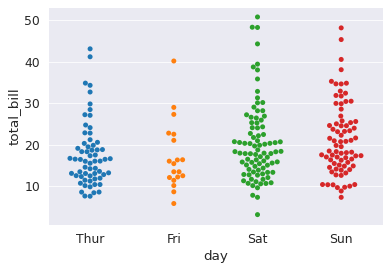

In [ ]:
# Swarm Plot
# sns.violinplot(x='day',y='total_bill',data=tips_df)
# sns.swarmplot(x='day',y='total_bill',data=tips_df,color='black')
sns.swarmplot(x='day',y='total_bill',data=tips_df)

## Palettes

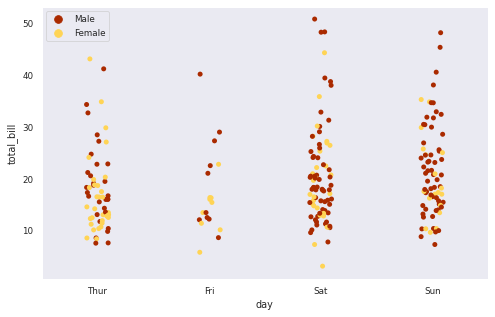

In [ ]:
# Palettes
plt.figure(figsize=(8,5))
sns.set_style('dark')
sns.set_context('paper')
sns.stripplot(x='day',y='total_bill',data=tips_df,hue='sex',palette='afmhot')
plt.legend(loc='best')

## Matrix Plots

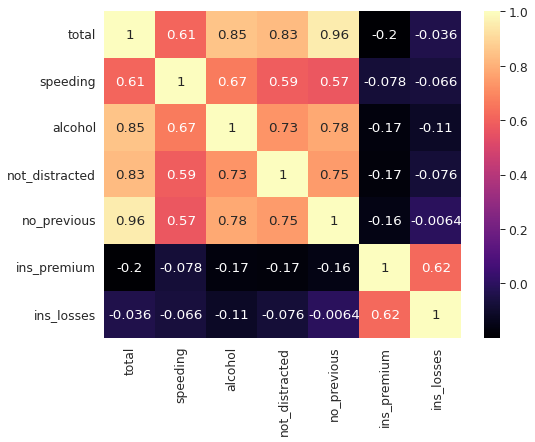

In [ ]:
# Heatmaps
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)

crash_mx = crash_df.corr()
sns.heatmap(crash_mx,annot=True,cmap='magma')

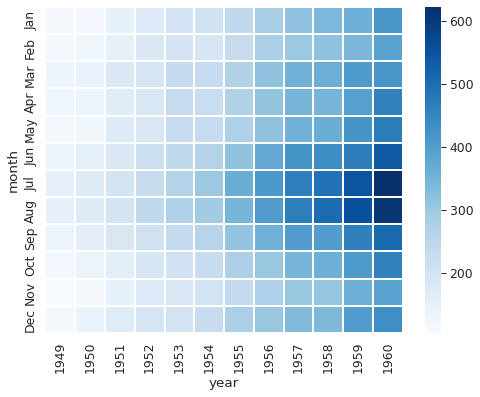

In [ ]:
# Heatmaps
plt.figure(figsize=(8,6))
flights_msx = flights_df.pivot_table(index='month',columns='year',values='passengers')
sns.heatmap(flights_msx,cmap='Blues',linecolor='white',linewidth=1)

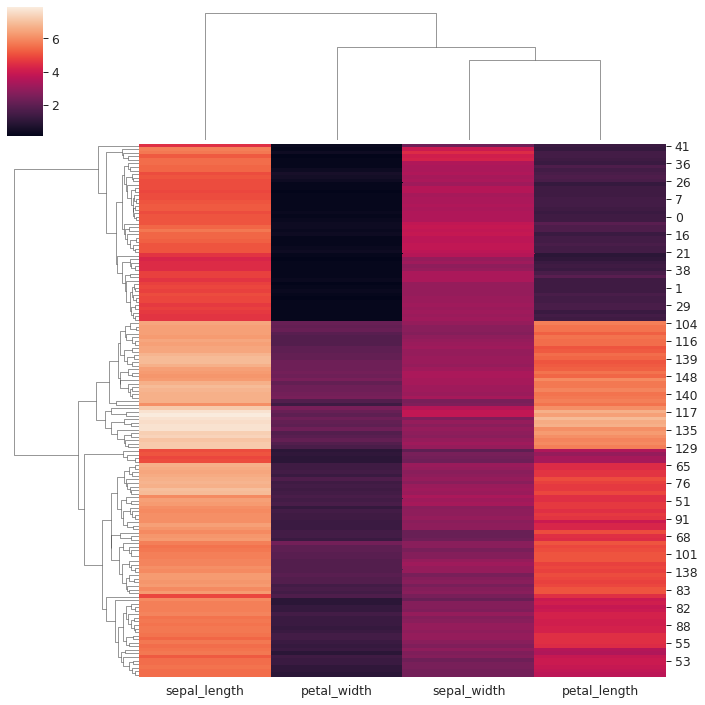

In [ ]:
# Cluster Map

sns.clustermap(iris_df.iloc[:,:-1])

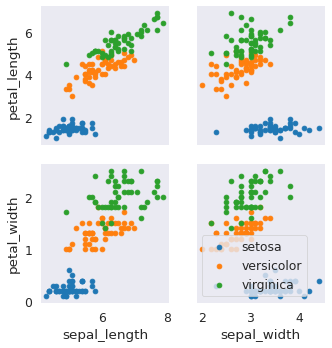

In [ ]:
# Pair Grid
iris_g = sns.PairGrid(iris_df,hue='species',x_vars=['sepal_length','sepal_width']
                      ,y_vars=['petal_length','petal_width'])
iris_g.map(plt.scatter)
plt.legend(loc='best')
# iris_g.map_diag(plt.hist)
# iris_g.map_offdiag(plt.scatter)
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

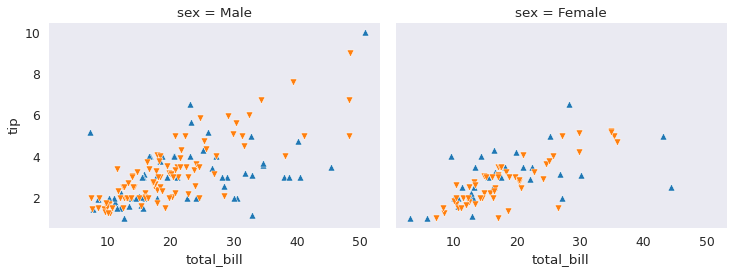

In [ ]:
# Facet Grid : Multiple Plots in a grid in which you are going to be able to define
# your columns

# tips_fg = sns.FacetGrid(tips_df,col='time',row='smoker')
# tips_fg.map(plt.hist,'total_bill',bins=10)
# tips_fg.map(plt.scatter,'total_bill','tip')

# tips_fg = sns.FacetGrid(tips_df,col='time',hue='smoker',height=4,aspect=1.3
#                         ,col_order=['Dinner','Lunch'],palette='Set1')
# tips_fg.map(plt.scatter,'total_bill','tip')

kws = dict(s=50,linewidth=0.5,edgecolor='w')
tips_fg = sns.FacetGrid(tips_df,col='sex',hue='smoker',height=4,aspect=1.3
                        ,hue_order=['Yes','No'],hue_kws=dict(marker=['^','v']))
tips_fg.map(plt.scatter,'total_bill','tip',**kws)

## Regression Plots

<Figure size 720x576 with 0 Axes>

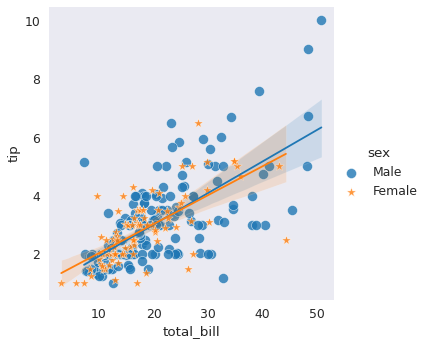

In [ ]:
plt.figure(figsize=(10,8))
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='total_bill',y='tip',hue='sex',data=tips_df,markers=['o','*'],
           scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'w'})

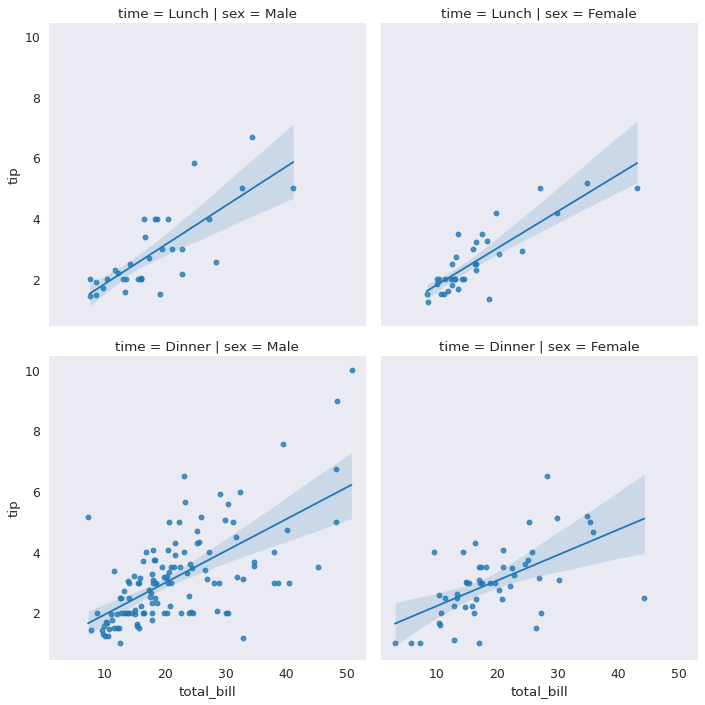

In [ ]:
sns.lmplot(x='total_bill',y='tip',col='sex',row='time',data=tips_df)

# Practice

## Olympics dataset

In [ ]:
# Goal: Practice different types of plots and scenarios using Python - Seaborn
# File Paths : 
file_ae='/content/drive/MyDrive/ML Datasets/athlete_events.csv'            
file_noc='/content/drive/MyDrive/ML Datasets/noc_regions.csv'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ae_df = pd.read_csv(file_ae)
noc_df = pd.read_csv(file_noc)
print(ae_df.shape)
ae_df.head()

(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
print(noc_df.shape)
noc_df.head()

(230, 3)


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


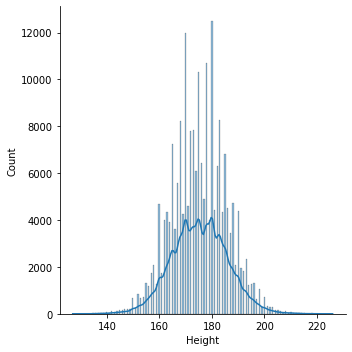

In [ ]:
# Histogram with NAs dropped
sns.displot(ae_df['Height'].dropna(),kde=True)

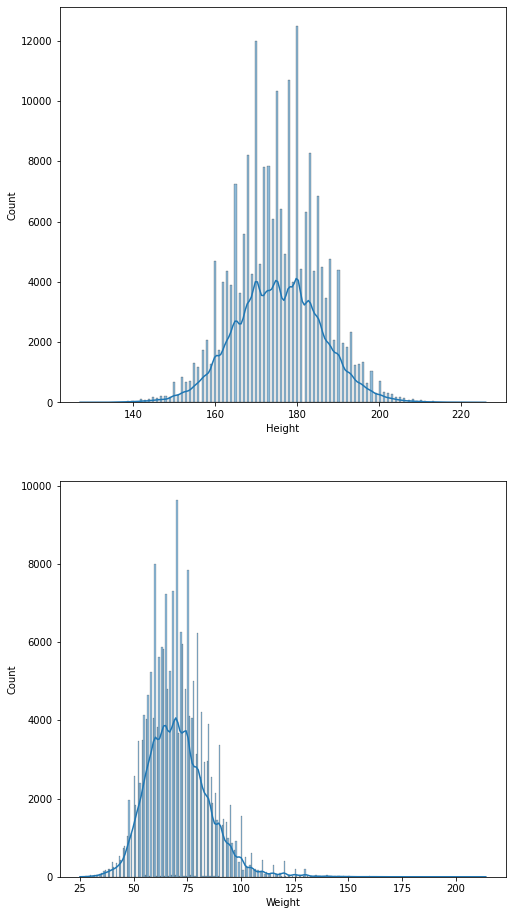

In [ ]:
# 2. Changing figure size using matplotlib.pyplot¶
fig,ax = plt.subplots(nrows=2,figsize=(8,16))
sns.histplot(ae_df['Height'].dropna(),kde=True,ax=ax[0])
sns.histplot(ae_df['Weight'].dropna(),kde=True,ax=ax[1])
plt.show()

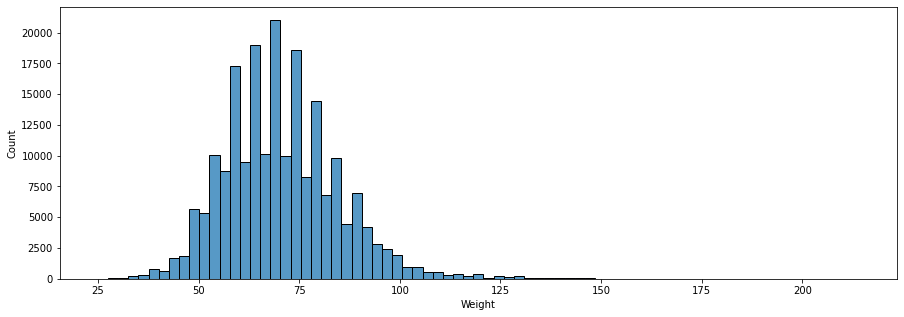

In [ ]:
# 3. Setting the number of bins for histogram and not displaying Kernel Density Estimation curve
fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(ae_df['Weight'].dropna(),bins=75,ax=ax)
plt.show()

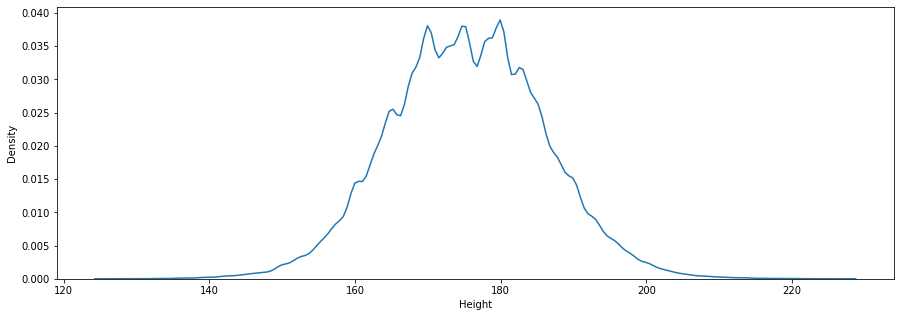

In [ ]:
# 4. Plotting just the KDE without histogram
fig,ax = plt.subplots(figsize=(15,5))
sns.kdeplot(ae_df['Height'].dropna(),ax=ax)

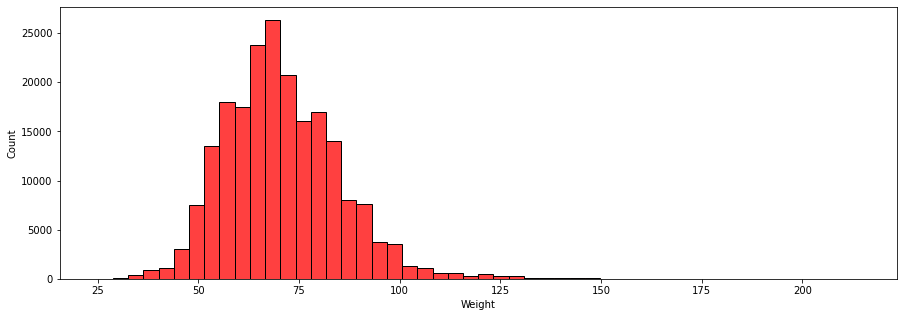

In [ ]:
# 5. Setting the color for histogram
fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(ae_df['Weight'].dropna(),bins=50,color='r',ax=ax)

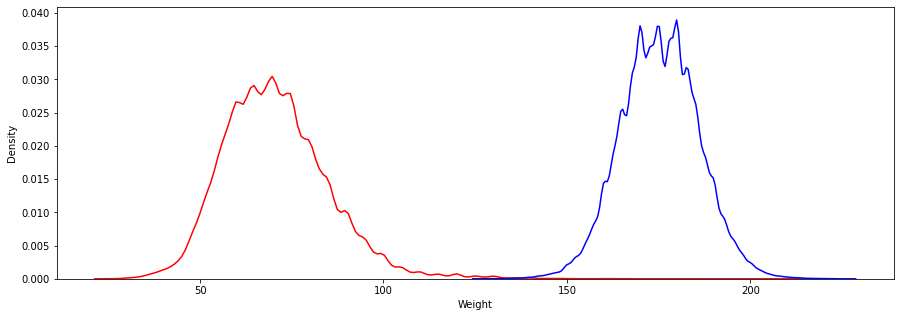

In [ ]:
# 6.  Multiple density plots on the same graph
fig , ax = plt.subplots(figsize=(15,5))
sns.kdeplot(ae_df['Weight'].dropna(),color='r',label='Weight')
sns.kdeplot(ae_df['Height'].dropna(),color='b',label='Height')

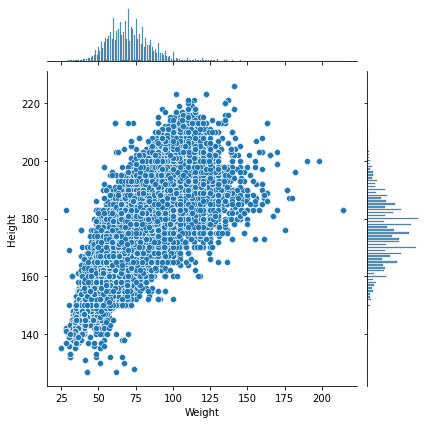

In [ ]:
# Comparing two CONTINUOUS features using jointplot()
sns.jointplot(x='Weight',y='Height',data=ae_df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


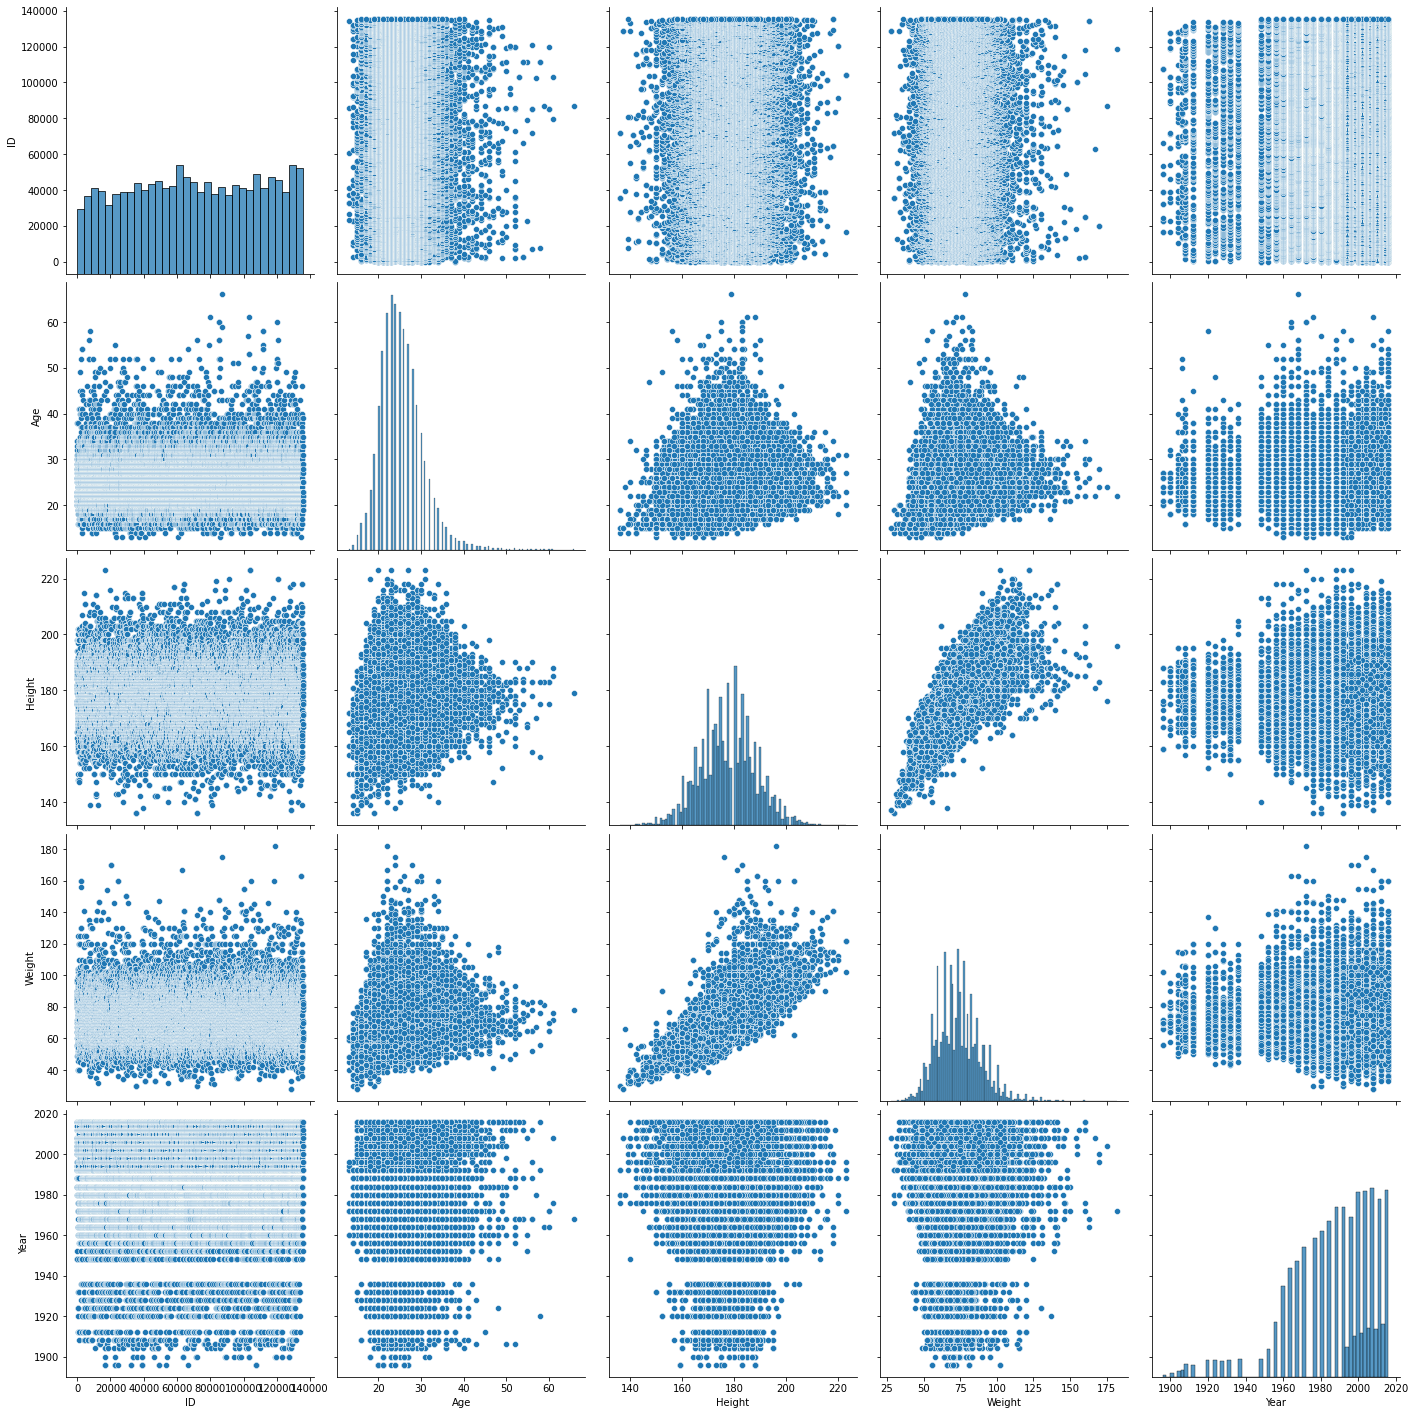

In [ ]:
# Comparing all continuous features using*pairplot()
sns.pairplot(ae_df.dropna(),size=4)

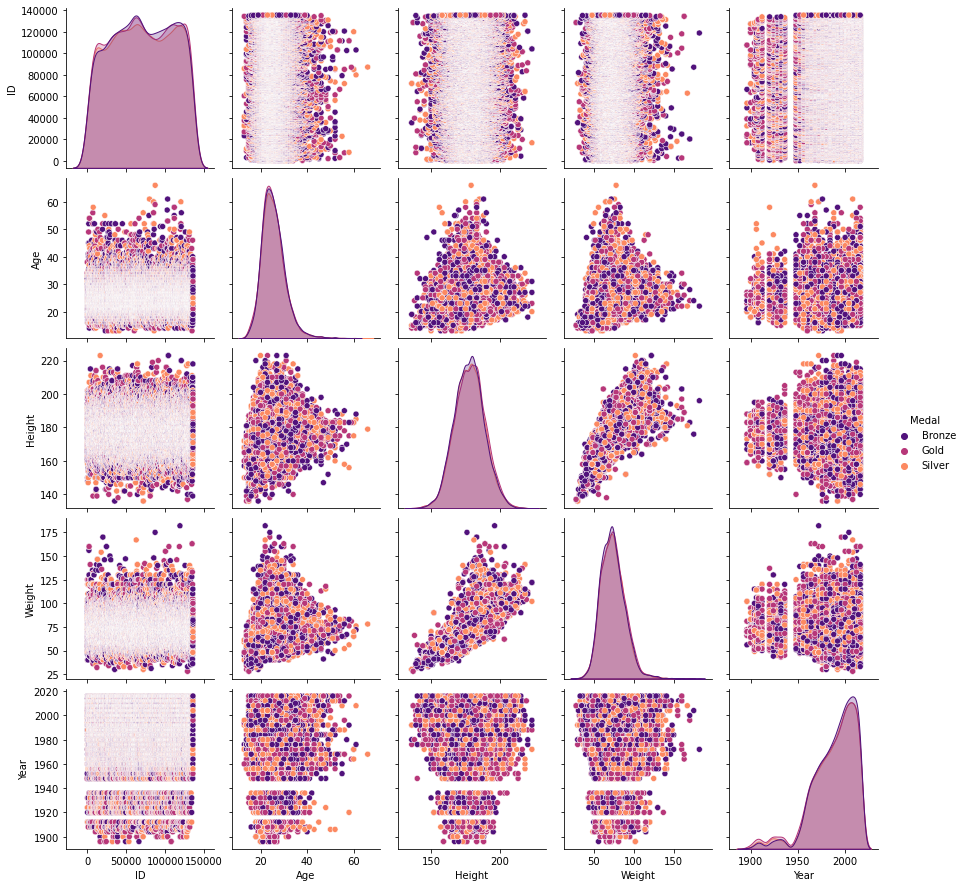

In [ ]:
# Representing a THIRD DIMENSION - COLOR in pairplot()
sns.pairplot(ae_df.dropna(),palette='magma',hue='Medal')

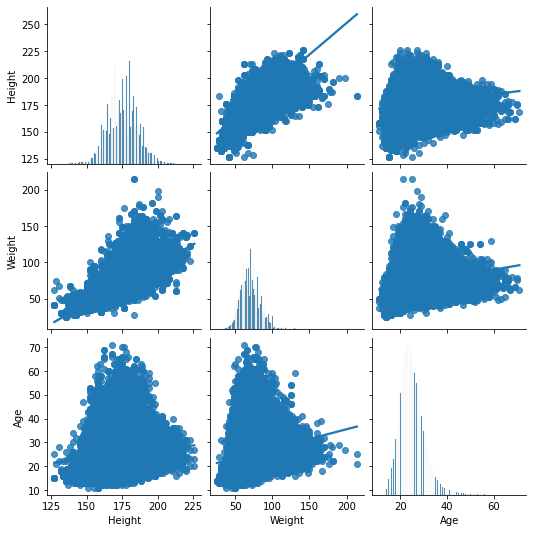

In [ ]:
# Linear regression line in pairplot()
sns.pairplot(ae_df[['Height','Weight','Age']].dropna(),kind='reg')

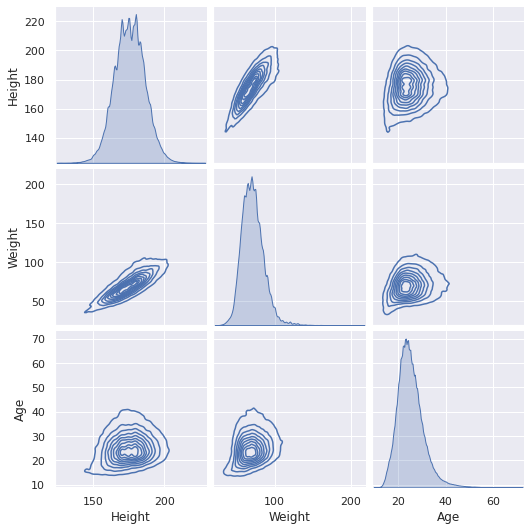

In [ ]:
#  In pairplot(), representing KDE plots on the diagonal instead of HISTOGRAM
sns.pairplot(ae_df[['Height','Weight','Age']].dropna(),kind='kde')

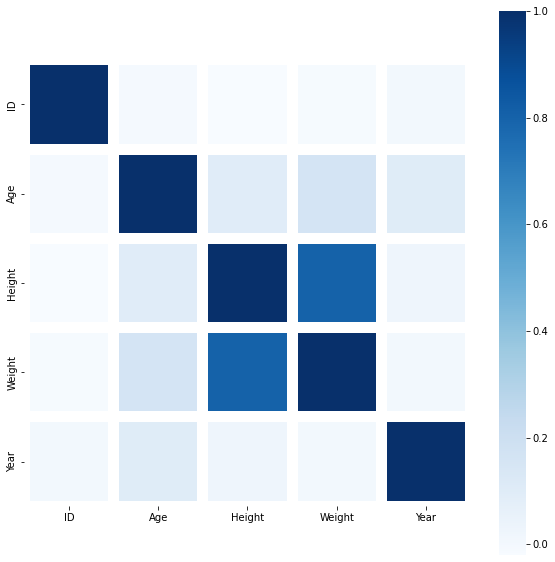

In [ ]:
# CORRELATION PLOT - Heatmap
x = ae_df.dropna().corr()
fig,ax = plt.subplots(figsize=(10,10))

sns.heatmap(x,square=True,fmt='0.2f',cmap='Blues',linewidth=10,color='white')